In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)
pd.set_option("display.precision", 2)

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = 12, 8

In [116]:
class Model:
    def __init__(self,input_address,alpha=2,beta=5,sigma=3,ro=0.8,th=80,n_population=22,max_iter=1000):
        self.alpha = alpha
        self.beta = beta
        self.sigma = sigma
        self.ro = ro
        self.th = th
        self.n_population = n_population
        self.max_iter = max_iter

        self.m, self.capacity, self.graph = self.preprocess(input_address)

        self.customers, self.demands = self.graph[1:,0]-1, self.graph[:,3]
        self.depot = self.graph[0,1:3]
        self.dists = np.linalg.norm(self.graph[:,np.newaxis,1:3]-self.graph[np.newaxis,:,1:3], axis=-1)
        self.pheromones = 1/(self.dists+np.diag(np.full(self.dists.shape[0],1)))
        # self.pheromones = np.ones((self.graph.shape[0],self.graph.shape[0]))
    
    def plot(self):
        graph = self.graph
        plt.plot(graph[0,1],graph[0,2], 'o')
        plt.plot(graph[1:,1],graph[1:,2], 'o')
        plt.grid(False)
        
    @staticmethod
    def preprocess(input_address):
        graph = []
        with open(input_address, 'r') as f:
            for i, row in enumerate(f.readlines()):
                if i == 0:
                    temp = [int(x) for x in row.split(' ') if x != '' and x != '\n']
                    m, capacity = temp[0],temp[1]
                else:
                    graph.append([int(x) for x in row.split(' ') if x != '' and x != '\n'])
        return m,capacity,np.array(graph)
    
    def ant_search(self):
        solution = []

        customers = self.customers.tolist()
        demands = self.demands.tolist()

        while(len(customers) != 0):
            path = []
            capacity = self.capacity
            
            customer = np.random.choice(customers)
            capacity -= demands[customer]
            path.append(customer)
            customers.remove(customer)

            while(len(customers) != 0 and capacity > 0):

                probs = []
                for i in customers:
                    probs.append((self.pheromones[i,customer]**self.alpha)*(1/self.dists[i,customer]**self.beta))
                probs = probs/np.sum(probs)

                customer = np.random.choice(customers, p=probs)
                capacity -= demands[customer]

                path.append(customer)
                customers.remove(customer)
            solution.append(path)
        return solution

    def evaluate(self,solution):
        dist = 0

        for path in solution:
            src = 0
            for des in path:
                dist += self.dists[src,des]
                src = des
            dist += self.dists[src,0]

        return dist

    def update(self,best_solution,solutions):
        avg_dist = np.sum([x[1] for x in solutions])/len(solutions)
        self.pheromones *= (self.ro+self.th/avg_dist)
        solutions.sort(key = lambda x: x[1])

        if best_solution:
            if(solutions[0][1] < best_solution[1]):
                best_solution = solutions[0]
            for path in best_solution[0]:
                for i in range(len(path)-1):
                    self.pheromones[path[i],path[i+1]] += self.sigma/best_solution[1]
                    self.pheromones[path[i+1],path[i]] += self.sigma/best_solution[1]

        else:
            best_solution = solutions[0]
        for l in range(self.sigma):
            paths = solutions[l][0]
            dist = solutions[l][1]
            for path in paths:
                for i in range(len(path)-1):
                    self.pheromones[path[i],path[i+1]] += (self.sigma-(l+1)/dist**(l+1))
                    self.pheromones[path[i+1],path[i]] += (self.sigma-(l+1)/dist**(l+1))
        return best_solution
    
    def learn(self):
        best_solution = None

        for _ in range(self.max_iter):
            solutions = []
            for _ in range(self.n_population):
                solution = self.ant_search()
                solutions.append((solution,self.evaluate(solution)))
            best_solution = self.update(best_solution,solutions)
            print(best_solution[1])
        return best_solution

    

    
            
model = Model('data.txt')
best_solution = model.learn()

882.5838162632394
882.5838162632394
862.7761906536773
845.1842762839262
845.1842762839262
845.1842762839262
845.1842762839262
845.1842762839262
845.1842762839262
845.1842762839262
845.1842762839262
845.1842762839262
845.1842762839262
845.1842762839262
845.1842762839262
845.1842762839262
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
831.4018264125798
822.4879865467293
822.4879865467293
822.4879865467293
822.4879865467293
822.487986

([[22, 34, 27, 10, 16, 4, 19], [7, 8, 2, 33, 25, 35, 14, 31, 37, 38, 12], [3, 24, 15, 13], [30, 20, 32, 18, 21, 23, 17, 36, 1, 6], [11, 26, 5, 9, 28, 29]], 809.6482036668979)


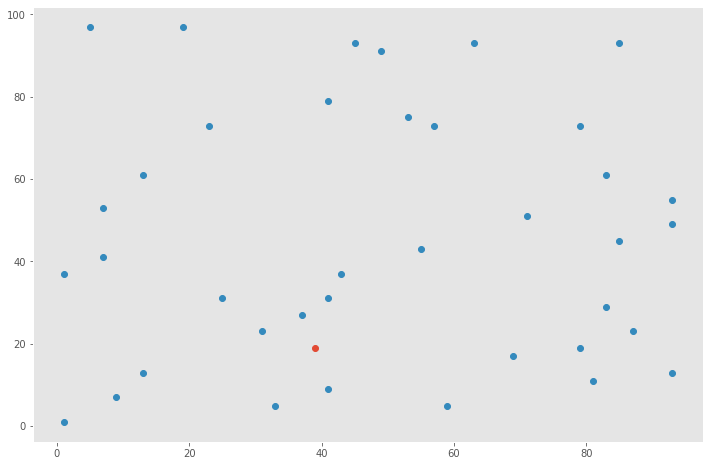

In [117]:
print(best_solution)
model.plot()

In [ ]:
import math
import RegExService
import random
import numpy
from functools import reduce
import sys
import getopt

alfa = 2
beta = 5
sigm = 3
ro = 0.8
th = 80
fileName = "E-n22-k4.txt"
iterations = 1000
ants = 22

def generateGraph():
    capacityLimit, graph, demand, optimalValue = RegExService.getData(fileName)
    vertices = list(graph.keys())
    vertices.remove(1)

    edges = { (min(a,b),max(a,b)) : numpy.sqrt((graph[a][0]-graph[b][0])**2 + (graph[a][1]-graph[b][1])**2) for a in graph.keys() for b in graph.keys()}
    feromones = { (min(a,b),max(a,b)) : 1 for a in graph.keys() for b in graph.keys() if a!=b }
    
    return vertices, edges, capacityLimit, demand, feromones, optimalValue

def solutionOfOneAnt(vertices, edges, capacityLimit, demand, feromones):
    solution = list()

    while(len(vertices)!=0):
        path = list()
        city = numpy.random.choice(vertices)
        capacity = capacityLimit - demand[city]
        path.append(city)
        vertices.remove(city)
        while(len(vertices)!=0):
            probabilities = list(map(lambda x: ((feromones[(min(x,city), max(x,city))])**alfa)*((1/edges[(min(x,city), max(x,city))])**beta), vertices))
            probabilities = probabilities/numpy.sum(probabilities)
            
            city = numpy.random.choice(vertices, p=probabilities)
            capacity = capacity - demand[city]

            if(capacity>0):
                path.append(city)
                vertices.remove(city)
            else:
                break
        solution.append(path)
    return solution

def rateSolution(solution, edges):
    s = 0
    for i in solution:
        a = 1
        for j in i:
            b = j
            s = s + edges[(min(a,b), max(a,b))]
            a = b
        b = 1
        s = s + edges[(min(a,b), max(a,b))]
    return s

def updateFeromone(feromones, solutions, bestSolution):
    Lavg = reduce(lambda x,y: x+y, (i[1] for i in solutions))/len(solutions)
    feromones = { k : (ro + th/Lavg)*v for (k,v) in feromones.items() }
    solutions.sort(key = lambda x: x[1])
    print(solutions)
    if(bestSolution!=None):
        if(solutions[0][1] < bestSolution[1]):
            bestSolution = solutions[0]
        for path in bestSolution[0]:
            for i in range(len(path)-1):
                feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))] = sigm/bestSolution[1] + feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))]
    else:
        bestSolution = solutions[0]
    for l in range(sigm):
        paths = solutions[l][0]
        L = solutions[l][1]
        for path in paths:
            for i in range(len(path)-1):
                feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))] = (sigm-(l+1)/L**(l+1)) + feromones[(min(path[i],path[i+1]), max(path[i],path[i+1]))]
    return bestSolution

def main():
    bestSolution = None
    vertices, edges, capacityLimit, demand, feromones, optimalValue = generateGraph()
    
    for i in range(iterations):
        solutions = list()
        for _ in range(ants):
            solution = solutionOfOneAnt(vertices.copy(), edges, capacityLimit, demand, feromones)
            solutions.append((solution, rateSolution(solution, edges)))
        bestSolution = updateFeromone(feromones, solutions, bestSolution)
        print(str(i)+":\t"+str(int(bestSolution[1]))+"\t"+str(optimalValue))
    return bestSolution

main()
